#Exercises: Universe Selection - Answer Key

## Lecture Link

This exercise notebook refers to this lecture. Please use the lecture for explanations and sample code.

https://www.quantopian.com/lectures#Universe-Selection

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantopian.pipeline.classifiers.morningstar import Sector
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.filters import QTradableStocksUS, AtLeastN
from quantopian.research import run_pipeline
from quantopian.pipeline.data import morningstar
from quantopian.pipeline.factors import CustomFactor, AverageDollarVolume

## Helper Functions

In [2]:
def calculate_daily_turnover(unstacked):
    return (unstacked
            .diff()        # Get True/False showing where values changed from previous day.
            .iloc[1:]      # Drop first row, which is meaningless after diff().
            .astype(bool)  # diff() coerces from bool -> object :(.  Undo that.
            .groupby(axis=1, level=0)  
            .sum())  

#Exercise 1: Examining the QTradableStocksUS Universe

##a. Initializing the Universe

Set the QTradableStocksUS as your universe by using the `QTradableStocksUS()` function.

In [3]:
# Your code goes here

universe = QTradableStocksUS()

## b. Finding Asset Composition

Use the pipeline API with the QTradableStocksUS as a screen to find and print the list of equities included in the QTradableStocksUS on 2016-07-01.

In [4]:
# Your code goes here

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])

,0
0,Equity(2 [ARNC])
1,Equity(24 [AAPL])
2,Equity(31 [ABAX])
3,Equity(39 [DDC])
4,Equity(41 [ARCB])
5,Equity(52 [ABM])
6,Equity(53 [ABMD])
7,Equity(62 [ABT])
8,Equity(64 [ABX])
9,Equity(67 [ADSK])


## c. Sector Exposure

Use the pipeline API with the QTradableStocksUS as a screen to find and print the sector composition of the universe on 2016-07-01.

In [5]:
SECTOR_CODE_NAMES = {
    Sector.BASIC_MATERIALS: 'Basic Materials',
    Sector.CONSUMER_CYCLICAL: 'Consumer Cyclical',
    Sector.FINANCIAL_SERVICES: 'Financial Services',
    Sector.REAL_ESTATE: 'Real Estate',
    Sector.CONSUMER_DEFENSIVE: 'Consumer Defensive',
    Sector.HEALTHCARE: 'Healthcare',
    Sector.UTILITIES: 'Utilities',
    Sector.COMMUNICATION_SERVICES: 'Communication Services',
    Sector.ENERGY: 'Energy',
    Sector.INDUSTRIALS: 'Industrials',
    Sector.TECHNOLOGY: 'Technology',
    -1 : 'Misc'
}

# Your code goes here

pipe = Pipeline(
    columns={'Sector': Sector()
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

sectors = result.groupby('Sector').size()
sectors.index = sectors.index.map(lambda code: SECTOR_CODE_NAMES[code])
sectors

Misc                        1
Basic Materials           132
Consumer Cyclical         308
Financial Services        270
Real Estate               170
Consumer Defensive        100
Healthcare                266
Utilities                  63
Communication Services     40
Energy                    121
Industrials               309
Technology                307
dtype: int64

## d. Turnover Rate

Use the pipeline API with the QTradableStocksUS as a screen and the `calculate_daily_turnover` helper function to find and plot the turnover of the universe during 2016.

,QTradableStocksUS
count,252.000000
mean,3.896825
std,2.042689
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,11.000000


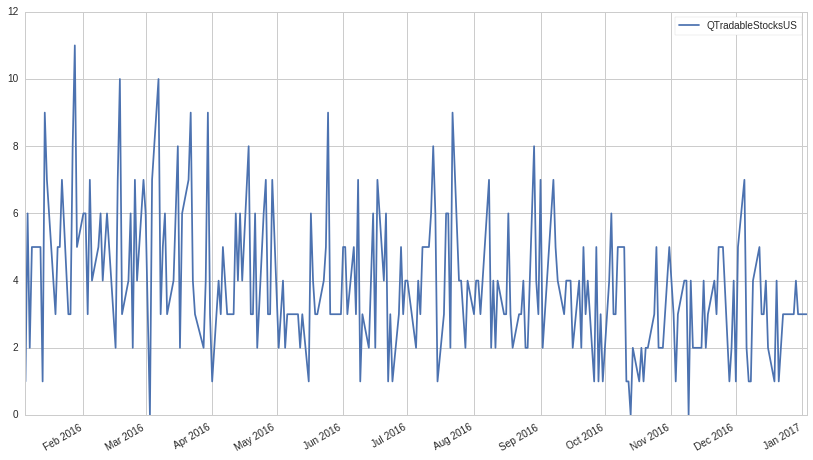

In [6]:
# Your code goes here

pipe = Pipeline(
    columns={'QTradableStocksUS' : universe
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-01-01', '2017-01-01')

result = result.unstack().fillna(False)

turnover = calculate_daily_turnover(result)

turnover.plot(figsize=(14, 8));

turnover.describe()

# Exercise 2: Examining Tradability

## a. NetIncome 1500

Create a universe consisting of the top 1500 equities by net income then find and print the list of equities included in the universe on 2016-07-01.

In [7]:
# Your code goes here

universe = morningstar.income_statement.net_income.latest.top(1500)

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])

,0
0,Equity(24 [AAPL])
1,Equity(62 [ABT])
2,Equity(66 [AB])
3,Equity(76 [TAP])
4,Equity(114 [ADBE])
5,Equity(122 [ADI])
6,Equity(128 [ADM])
7,Equity(154 [AEM])
8,Equity(161 [AEP])
9,Equity(166 [AES])


## b. Measuring Tradability


Find the average 200 day average dollar volume of the NetIncome 1500 universe using the `AverageDollarVolume` built in factor and compare to that of the QTradableStocksUS.

In [8]:
# Your code goes here

pipe = Pipeline(
    columns={'Average Dollar Volume' : AverageDollarVolume(window_length = 200)
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

print "NetIncome 1500 ADV:", np.mean(result['Average Dollar Volume'])

pipe = Pipeline(
    columns={'Average Dollar Volume' : AverageDollarVolume(window_length = 30)
    },
    screen=QTradableStocksUS()
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

print "QTradableStocksUS ADV:", np.mean(result['Average Dollar Volume'])

NetIncome 1500 ADV: 74816585.5336
QTradableStocksUS ADV: 61220949.8328


Using average dollar volume as a stand-in liquidity metric, the QTradableStocksUS is more liquid than the NetIncome 1500. 

We used ADV as a liquidity metric here as it is an important indicator and its calculation is simple. However, average dollar volume is not a perfect measurement of liquidity as liquidity is determined by several factors and volume is only one of those. For more information on liquidity and its effects on algorithm performance, refer to the [lecture on Volume, Slippage, and Liquidity](https://www.quantopian.com/research/notebooks/Cloned%20from%20%22Quantopian%20Lecture%20Series%3A%20Introduction%20to%20Volume%2C%20Slippage%2C%20and%20Liquidity%22.ipynb)

# Exercise 3: Sector Balance

## a. Dividend 1500

Create a universe consisting of the top 1500 equities by dividend yield then find and print the list of equities included in the this universe on 2016-07-01.

In [9]:
# Your code goes here

universe = morningstar.income_statement.net_income.latest.top(1500)

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])

,0
0,Equity(24 [AAPL])
1,Equity(62 [ABT])
2,Equity(66 [AB])
3,Equity(76 [TAP])
4,Equity(114 [ADBE])
5,Equity(122 [ADI])
6,Equity(128 [ADM])
7,Equity(154 [AEM])
8,Equity(161 [AEP])
9,Equity(166 [AES])


## b. Dividend 1500 Sector Composition

Find and print the sector composition of the universe on 2016-07-01.

In [10]:
SECTOR_CODE_NAMES = {
    Sector.BASIC_MATERIALS: 'Basic Materials',
    Sector.CONSUMER_CYCLICAL: 'Consumer Cyclical',
    Sector.FINANCIAL_SERVICES: 'Financial Services',
    Sector.REAL_ESTATE: 'Real Estate',
    Sector.CONSUMER_DEFENSIVE: 'Consumer Defensive',
    Sector.HEALTHCARE: 'Healthcare',
    Sector.UTILITIES: 'Utilities',
    Sector.COMMUNICATION_SERVICES: 'Communication Services',
    Sector.ENERGY: 'Energy',
    Sector.INDUSTRIALS: 'Industrials',
    Sector.TECHNOLOGY: 'Technology',
    -1 : 'Misc'
}

# Your code goes here

universe = morningstar.valuation_ratios.dividend_yield.latest.top(1500)


pipe = Pipeline(
    columns={'Sector': Sector()
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

sectors = 100*result.groupby('Sector').size()/1500
sectors.index = sectors.index.map(lambda code: SECTOR_CODE_NAMES[code])
sectors

Basic Materials            4.600000
Consumer Cyclical          6.066667
Financial Services        33.866667
Real Estate               21.200000
Consumer Defensive         2.133333
Healthcare                 1.800000
Utilities                  4.000000
Communication Services     2.400000
Energy                    11.800000
Industrials                8.200000
Technology                 3.933333
dtype: float64

The Dividend 1500 has a very unbalanced sector composition, with 34% of equities being from the financial services sector. This exposes the universe to sector risk and makes it vulnerable to volatility in the financial services sector. The QTradableStocksUS avoids this by capping the number of equities from any single sector at 30%.

# Exercise 4: Turnover Smoothing

## a. PE 1500

Create a universe consisting of the top 1500 equities by price to earnings ratio then find and print the list of equities included in the this universe on 2016-07-01.

In [11]:
# Your code goes here

universe = morningstar.valuation_ratios.pe_ratio.latest.top(1500)

pipe = Pipeline(
    columns={
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-07-01', '2016-07-01')

pd.DataFrame(result.index.levels[1])

,0
0,Equity(31 [ABAX])
1,Equity(39 [DDC])
2,Equity(52 [ABM])
3,Equity(53 [ABMD])
4,Equity(67 [ADSK])
5,Equity(69 [ACAT])
6,Equity(76 [TAP])
7,Equity(100 [IEP])
8,Equity(110 [ACXM])
9,Equity(114 [ADBE])


## b. PE 1500 Turnover

Use the `calculate_daily_turnover` helper function to find and plot the turnover of the PE 1500 universe during 2016. Compare the average to that of the QTradableStocksUS.

Price to Earnings Ratio 1500    23.269841
Name: mean, dtype: float64


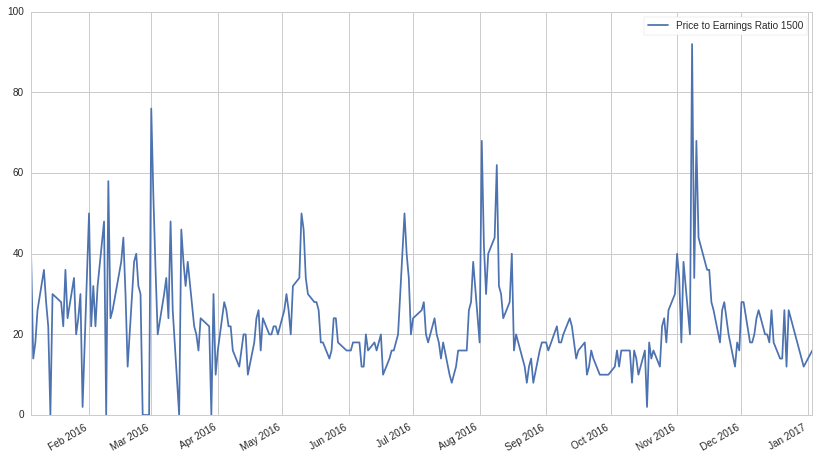

In [12]:
# Your code goes here

pipe = Pipeline(
    columns={'Price to Earnings Ratio 1500' : universe
    },
    screen=universe
)

result = run_pipeline(pipe, '2016-01-01', '2017-01-01')

result = result.unstack().fillna(False)

turnover = calculate_daily_turnover(result)

turnover.plot(figsize=(14, 8));

print turnover.describe().loc['mean']

The mean turnover was almost twice as high as in the QTradableStocksUS, which has built-in smoothing features to prevent equities near the threshold from entering and exiting frequently.

## c. Smoothing the PE 1500

Using `AtLeastN`, apply a smoothing function to the PE 1500 to reduce turnover noise and find the new mean turnover.

In [13]:
# Your code goes here

universe_smoothed = AtLeastN(inputs=[universe],
                       window_length=21,
                       N=16,)

pipe = Pipeline(
    columns={'Smoothed PE 1500' : universe_smoothed
    },
    screen=universe_smoothed
)

result = run_pipeline(pipe, '2016-01-01', '2017-01-01')

result = result.unstack().fillna(False)

turnover = calculate_daily_turnover(result)

print turnover.describe().loc['mean']

Smoothed PE 1500    8.849206
Name: mean, dtype: float64


The mean turnover of the smoothed universe is less than half of what it was before the smoothing. This action reduced the noise from small movements near the threshold and left only the meaningful turnover events.

---

Congratulations on completing the Universe Selection answer key!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*